In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Customer Market Segmentation

In [3]:
# Steps to Follow :
# 1) Customer data 
# 2) Data pre processing
# 3) Data Analysis
# 4) Finding the number of optimum clusters(Elbow method)
# 5) Clustering
# 6) data Visualization

In [5]:
from sklearn.cluster import KMeans

In [6]:
data=pd.read_csv('Mall_Customers.csv')

In [7]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
data.shape

(200, 5)

In [10]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
#no null values

In [16]:
#choosing the annual income column and Spending Score Column 
X=data.iloc[:,[3,4]].values

In [17]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [18]:
# Finding the number of clusters
#Using WCSS(Within Cluster Sum of Squares): Elbow method

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=2)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

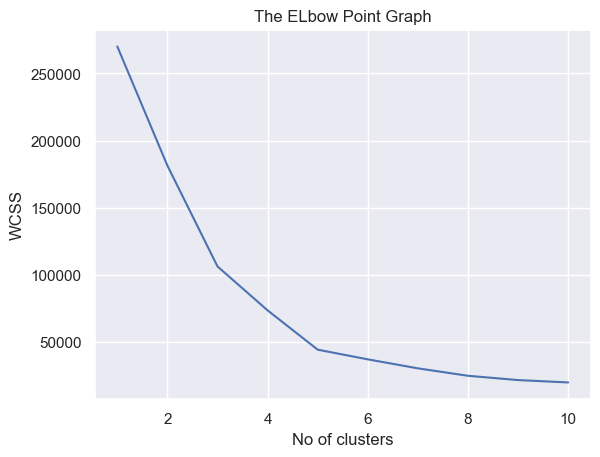

In [19]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The ELbow Point Graph')
plt.xlabel("No of clusters")
plt.ylabel('WCSS')

In [20]:
# K=5 As the elbow graph shows a pointy change at no of clusters equal to 5.

In [23]:
kmeans=KMeans(n_clusters=5, init='k-means++',random_state=2)

In [24]:
Y=kmeans.fit_predict(X)

In [25]:
print(Y)

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


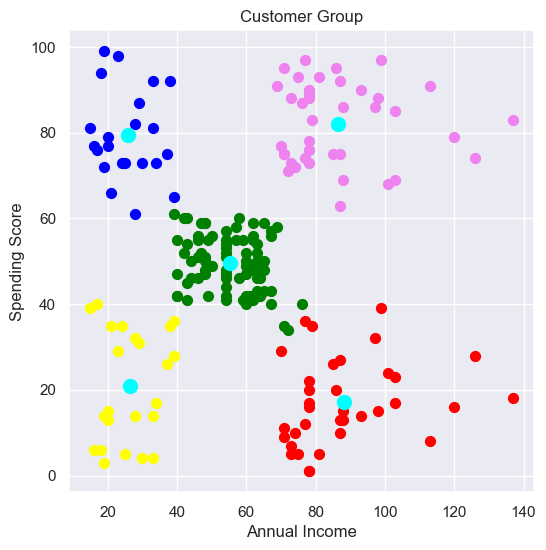

In [32]:
#Plotting all the clusters and their centroids 
plt.figure(figsize=(6,6))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='violet',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='blue',label='Cluster 5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100, c='cyan', label='Centroids')

plt.title('Customer Group')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()